In [1]:
import pandas as pd
import re, os
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

df = pd.read_csv("~/Desktop/CompAnalysis/FinalProject/oneHotDfAllCols.csv")


In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

us_states = gpd.read_file('~/Desktop/CompAnalysis/FinalProject/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')

#us_states = gpd.read_file('~/Desktop/CompAnalysis/FinalProject/cb_2018_us_state_5m/cb_2018_us_state_5m.shp')

us_statesSortedGEOID = us_states.sort_values('GEOID')

In [3]:

#get ride of PR
us_statesSortedGEOID = us_statesSortedGEOID.drop(7,axis=0)

#get rid oh AK
us_statesSortedGEOID = us_statesSortedGEOID.drop(25,axis=0)



In [4]:
#make data for just drugs 
#missing data for some states and need to get rid of DC
#missing for DE(10), ID(16), Maryland(24), NJ(34), NM (35), OR (41), VT(50)
stateRape = {}

for index, row in df.iterrows():
     if row['rape/SA'] == 1:
          if row['STATE'] in stateRape:
               stateRape[row['STATE']].append(row['SENTLGTH'])
               #print()
          else:
               stateRape[row['STATE']] = [row['SENTLGTH']]  


print(stateRape)






In [11]:
value = stateRape[1]
print(value)
print(type(value))
print(sum(value)/len(value))
most_common_number = max(set(value), key = value.count)
print(most_common_number)

[4, 0, 3, 5, 2, 3, 4, 5, 4, 2, 3, 4, 2, 4, 2, 3, 2, 5, 4, 0, 4, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 4, 4, 4, 2, 3, 5, 4, 5, 0, 4, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 1, 3, 3, 3, 2, 1, 2, 4, 4, 3, 3, 3, 2, 0, 2, 0, 2, 0, 3, 0, 0, 1, 1, 2, 2, 1, 2, 2, 4, 5, 5, 5, 5, 4, 0, 3, 2, 4, 2, 2, 4, 2, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0, 4, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 3, 4, 5, 2, 0, 2, 5, 2, 4, 5, 5, 4, 5, 3, 0, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 3, 3, 2, 4, 2, 2, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 2, 2, 2, 2, 3, 5, 2, 3, 2, 3, 3, 2, 3, 3, 2, 4, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 4, 2, 3, 5, 2, 1, 3, 3, 3, 2, 3, 3, 1, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 3, 4, 5, 4, 4, 4, 4, 5, 4, 2, 4, 5, 4, 4, 4, 4, 4, 1, 5, 

In [9]:
stateDrugsFinal = {10: 0 , 16: 0, 24: 0, 34:0, 35: 0, 41: 0, 50:0}
for state in stateRape.keys():
   valueList = stateRape[state]
   average =  sum(valueList)/len(valueList)
   roundedAverage = np.round(average, decimals=0)
   stateDrugsFinal[state] = roundedAverage

dfStateRape = pd.DataFrame(stateDrugsFinal.items(), columns=['GEOID', 'sentenceLen'])

dfStateRape['GEOID'] = dfStateRape['GEOID'].astype('object')
dfStateRape['sentenceLen'] = dfStateRape['sentenceLen'].astype(int)

dfStateRapeSorted = dfStateRape.sort_values('GEOID')

#print(dfStateDrugsSorted)

sentenceLenList = []

for index, row in dfStateRapeSorted.iterrows():
   sentenceLenList.append(row['sentenceLen'])

print(dfStateRapeSorted)
print(sentenceLenList)
print(len(sentenceLenList))


   GEOID  sentenceLen
7      1            3
38     2            3
40     4            3
8      5            3
49     6            3
9      8            3
46     9            3
0     10            0
35    11            2
31    12            3
10    13            3
37    15            3
1     16            0
29    17            3
43    18            3
11    19            4
47    20            3
36    21            3
50    22            3
32    23            2
2     24            0
30    25            3
12    26            4
13    27            3
14    28            3
15    29            3
48    30            4
16    31            3
17    32            4
18    33            3
3     34            0
4     35            0
34    36            3
19    37            2
20    38            3
21    39            5
41    40            4
5     41            0
42    42            3
44    44            2
22    45            3
23    46            3
39    47            3
33    48            3
24    49  

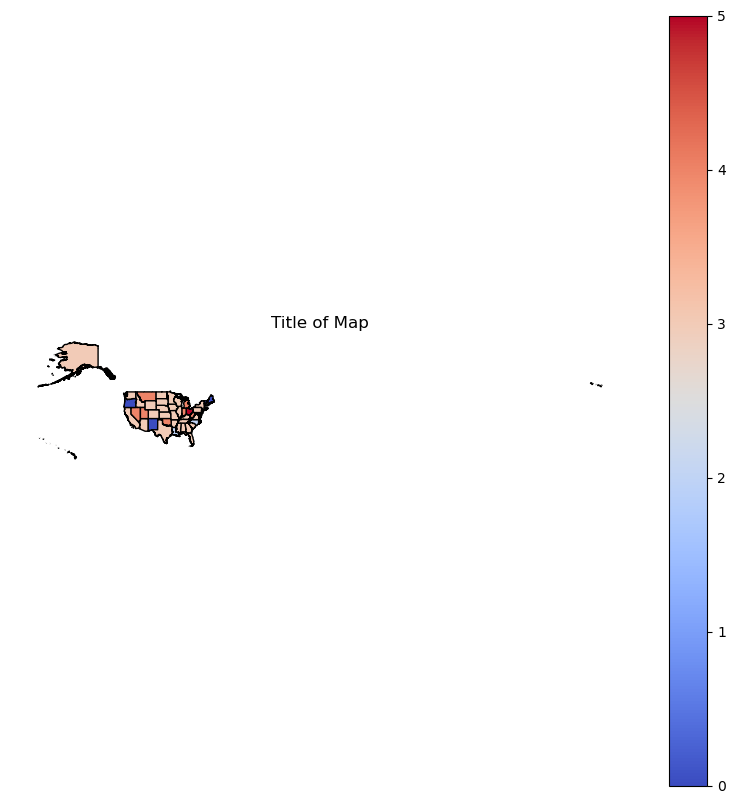

In [11]:
us_statesSortedGEOID['sentenceLen'] = sentenceLenList [:1] + sentenceLenList[2:]

from matplotlib.colors import ListedColormap


# Define custom colormap
cmap = ListedColormap(['#0b6c96', '#87d5d2', '#e7d49b', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226', '#91080c', '#5b1427', '#431a51', '#1d085b'])

#make plot
fig, ax = plt.subplots(figsize=(10, 10))
us_statesSortedGEOID.plot(ax=ax, column='sentenceLen', cmap=cmap, edgecolor='black') 
ax.set_title('Average sentance length for Rape in each State')
sm = plt.cm.ScalarMappable(cmap=cmap)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.8,)
ax.set_axis_off()

plt.show()